<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
Machine Learning-Based Prediction of Ticket Cancellations
</font>
</h1>

<h2 align="left" style="line-height:200%;font-family:vazir;font-family:Arial;color:#0099cc">
<font face="Arial" color="#0099cc">
Introduction and Problem Statement
</font>
</h2>


<h4 align="left">
<font face="Arial" >
In this project, we aim to predict whether users will cancel their tickets or not. For each cancellation, MrBilit must pay a penalty fee to the transportation company. Therefore, canceled tickets mean imposing costs on the company. Therefore, identifying tickets that are likely to be canceled is a great help in managing the company's risk.
</font>
</h4>


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
معرفی مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=5>
مجموعه داده آموزشی شامل ۱۰۱۰۱۷ سطر است که در جدول زیر، توضیحات هر ستون آمده است.
</font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=5>
    
|ستون|توضیحات|
|:------:|:---:|
|Created|زمان ثبت بلیط|
|CancelTime|زمانی که مسافر بلیط را کنسل کرده است|
|DepartureTime|زمان حرکت|
|BillID|شناسه خرید|
|TicketID|شناسه بلیط|
|ReserveStatus|تعداد ماشین‌های گذرکرده|
|UserID|شناسه کاربری|
|Male|آیا بلیط متعلق به زن است یا مرد|
|Price|قیمت بلیط بدون تخفیف|
|CouponDiscount|تخفیفی که شخص روی بلیط اعمال کرده است|
|From|مبدا سفر|
|To|مقصد سفر|
|Domestic|آیا سفر، داخلی است یا خارجی|
|VehicleType|جزئیات وسیله نقلیه را مشخص می‌کند|
|VehicleClass|آیا وسیله نقلیه، فرست‌کلس است یا نه|
|Vehicle|نوع وسیله نقلیه|
|HashPassportNumber_p|هش‌شده شماره پاسپورت|
|HashEmail|هش‌شده ایمیل|
|BuyerMobile|هش‌شده شماره موبایل|
|NationalCode|هش‌شده شماره‌ملی|
|TripReason|دلیل سفر|
|Cancel|آیا بلیط کنسل شده‌است یا نه|
    
</font>
</div>
</center>


<h2 align="left" style="line-height:200%;font-family:vazir;font-family:Arial;color:#0099cc">
<font face="Arial" color="#0099cc">
Importing Essential Libraries
</font>
</h2>

In [25]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, classification_report, confusion_matrix

<h2 align="left" style="line-height:200%;font-family:vazir;font-family:Arial;color:#0099cc">
<font face="Arial" color="#0099cc">
Reading the dataset and splitting it into training and testing sets.
</font>
</h2>

In [26]:
train_data = pd.read_csv('/kaggle/input/mrbilit-trip-information-dataset/mrbilit_dataset.csv' , parse_dates = ['Created' , 'DepartureTime'] )
train_data

,Created,CancelTime,DepartureTime,BillID,TicketID,ReserveStatus,UserID,Male,Price,CouponDiscount,...,Domestic,VehicleType,VehicleClass,TripReason,Vehicle,Cancel,HashPassportNumber_p,HashEmail,BuyerMobile,NationalCode
0,2022-07-26 13:33:20.457,NaN,2022-07-26 16:30:00,38428546,7445571.0,3,NaN,True,1180000.0,0.0,...,1,VIPمانیتوردار-شارژراختصاصی تخت شو مارال (جدید)...,True,Work,Bus,0,NaN,NaN,302222356019,330024570
1,2022-10-27 23:07:01.837,2022-10-27 23:26:39.070,2022-10-29 09:45:00,39768762,7762719.0,5,NaN,False,1050000.0,0.0,...,1,classicus 2+2,True,Int,Bus,1,NaN,NaN,900764168521,995520696
2,2022-09-12 11:01:13.607,NaN,2022-10-03 18:35:00,39128001,2327596.0,5,800398.0,False,4674000.0,0.0,...,1,فوکر 100,False,Int,Plane,0,NaN,1c44d7a76b52341fa12dcfa993138576befcc9ebf01d14...,749804783291,979382950
3,2022-08-08 17:43:35.840,NaN,2022-08-08 22:30:00,38606546,7495440.0,3,NaN,True,1200000.0,0.0,...,1,VIPدرسا+مانیتوردار+شارژراختصاصی+پذیرایی,True,Work,Bus,0,NaN,NaN,781396205677,911237229
4,2022-11-01 15:12:56.823,NaN,2022-11-03 11:30:00,39822185,2356902.0,5,NaN,True,6222000.0,0.0,...,1,NaN,False,Work,Plane,0,NaN,bb38b345aec02255e31d178492907175c5984f2a1f5b59...,524576220177,727496008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101012,2022-10-27 21:41:35.803,NaN,2022-11-05 20:15:00,39767774,3082282.0,2,NaN,False,7200000.0,0.0,...,1,5ستاره بيزينس سلامت فدك,NaN,Int,Train,0,NaN,NaN,395081863564,789320493
101013,2022-09-24 15:51:11.993,NaN,2022-10-21 09:15:00,39319207,3026516.0,2,151423.0,False,4292000.0,0.0,...,1,4ستاره4تخته سپهر,NaN,Int,Train,0,NaN,3f28ed65a16d629747e4d27fab100b2b082fcbdf7ec831...,130026405332,866503410
101014,2022-08-12 13:46:20.480,NaN,2022-08-12 23:59:00,38653461,7508988.0,3,NaN,True,1320000.0,0.0,...,1,VIP 2+1 / مانیتوردار / سیستم تهویه مطبوع / تخ...,True,Int,Bus,0,NaN,NaN,784949357488,881677039
101015,2022-06-20 15:15:37.780,NaN,2022-06-25 10:10:00,37880627,1057205.0,5,641744.0,True,13000000.0,0.0,...,1,NaN,False,Work,Plane,0,NaN,750690ca99468f159eff6ad928cec4339b089af8c2e6dc...,766602541733,403505466


In [27]:
train_data, test_data = train_test_split(train_data, test_size=0.1, random_state=5)


<h2 align="left" style="line-height:200%;font-family:vazir;font-family:Arial;color:#0099cc">
<font face="Arial" color="#0099cc">
Let's begin by exploring and preprocessing the data.
</font>
</h2>




<h3 style="text-align: left; font-family: Arial;">
  <strong>We will take a general overview of the features and examine the data status.</strong>
</h3>

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90915 entries, 81173 to 35683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Created               90915 non-null  datetime64[ns]
 1   CancelTime            13744 non-null  object        
 2   DepartureTime         90915 non-null  datetime64[ns]
 3   BillID                90915 non-null  int64         
 4   TicketID              90915 non-null  float64       
 5   ReserveStatus         90915 non-null  int64         
 6   UserID                38243 non-null  float64       
 7   Male                  90915 non-null  bool          
 8   Price                 90915 non-null  float64       
 9   CouponDiscount        90915 non-null  float64       
 10  From                  90915 non-null  object        
 11  To                    90915 non-null  object        
 12  Domestic              90915 non-null  int64         
 13  VehicleType      

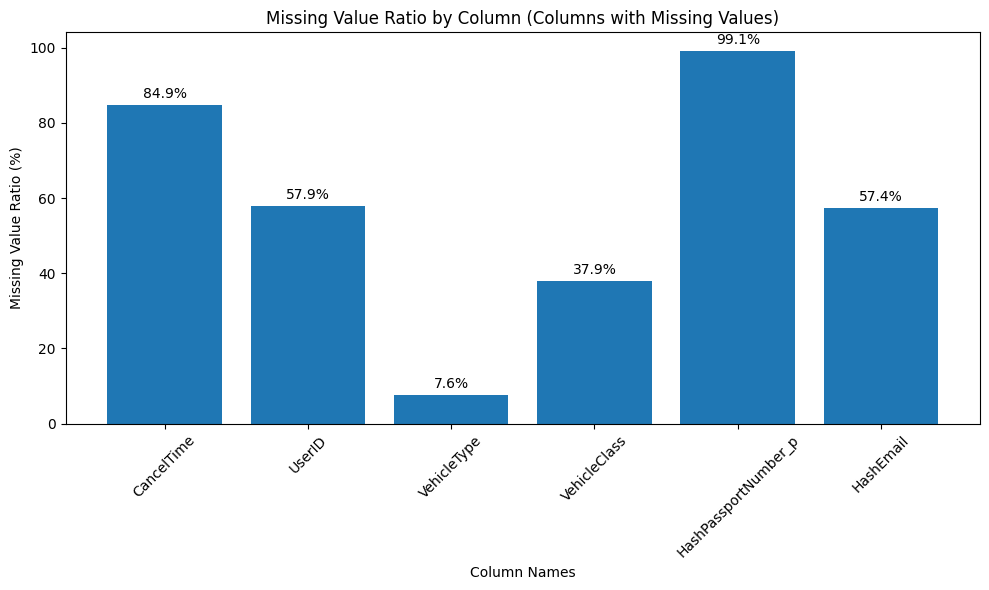

In [29]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
df_with_missing = train_data.copy()
missing_cols = df_with_missing.columns[df_with_missing.isnull().any()]
df_filtered = df_with_missing[missing_cols]
missing_ratios = df_filtered.isnull().mean() * 100
plt.figure(figsize=(10, 6))
if len(missing_ratios) > 0:
  bars = plt.bar(missing_ratios.index, missing_ratios.values)
  plt.xlabel("Column Names")
  plt.ylabel("Missing Value Ratio (%)")
  plt.title("Missing Value Ratio by Column (Columns with Missing Values)")
  for bar in bars:
      yval = bar.get_height()
      plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f"{yval:.1f}%", ha='center', va='bottom')

  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()
else:
  print("There are no columns with missing values in your data!")

In [30]:
vehicle_type_counts = train_data['VehicleType'].value_counts().count()
print(vehicle_type_counts)

3074



<h3 style="text-align: left; font-family: Arial;">
  <strong>Let's remove the 'CancelTime' feature as it only reflects past cancellations and doesn't predict future ones. We'll also focus on identifying features that indicate potential cancellations before they happen.</strong>
</h3>

In [31]:
train_data.drop('CancelTime', axis=1, inplace=True)

In [32]:
train_data.describe()

,Created,DepartureTime,BillID,TicketID,ReserveStatus,UserID,Price,CouponDiscount,Domestic,Cancel,BuyerMobile,NationalCode
count,90915,90915,9.091500e+04,9.091500e+04,90915.000000,38243.000000,9.091500e+04,9.091500e+04,90915.000000,90915.000000,9.091500e+04,9.091500e+04
mean,2022-07-20 07:40:32.776986112,2022-07-26 07:44:03.743276544,3.832618e+07,4.934980e+06,3.163328,578260.807050,3.216420e+06,5.003949e+03,0.992092,0.151097,5.038735e+11,1.588451e+14
min,2022-01-31 21:03:45.487000,2022-01-31 23:59:00,3.591084e+07,1.015844e+06,2.000000,7958.000000,-1.514000e+06,0.000000e+00,0.000000,0.000000,1.170136e+07,2.900000e+02
25%,2022-05-22 21:56:01.426499840,2022-05-29 16:45:00,3.743548e+07,2.847476e+06,2.000000,338141.000000,1.080000e+06,0.000000e+00,1.000000,0.000000,2.580028e+11,2.500405e+08
50%,2022-08-04 10:55:23.816999936,2022-08-11 16:00:00,3.855511e+07,3.078578e+06,3.000000,613090.000000,1.690000e+06,0.000000e+00,1.000000,0.000000,5.052501e+11,5.017679e+08
75%,2022-09-24 14:01:09.863000064,2022-09-29 15:00:00,3.931258e+07,7.431198e+06,4.000000,821860.000000,3.068500e+06,0.000000e+00,1.000000,0.000000,7.510403e+11,7.502481e+08
max,2022-11-03 00:22:51.387000,2023-03-07 18:05:00,3.984016e+07,7.782861e+06,5.000000,983278.000000,3.837646e+08,1.443333e+07,1.000000,1.000000,9.999831e+11,9.790847e+17
std,NaN,NaN,1.099443e+06,2.411379e+06,1.077265,273642.611185,7.022877e+06,7.331650e+04,0.088578,0.358146,2.876358e+11,1.021546e+16


In [33]:
negative_zero_prices = train_data[train_data['Price'] <= 0]
negative_zero_prices

,Created,DepartureTime,BillID,TicketID,ReserveStatus,UserID,Male,Price,CouponDiscount,From,...,Domestic,VehicleType,VehicleClass,TripReason,Vehicle,Cancel,HashPassportNumber_p,HashEmail,BuyerMobile,NationalCode
45449,2022-03-08 08:45:13.923,2022-03-10 19:25:00,36359345,2686190.0,4,328142.0,True,-1514000.0,0.0,تهران,...,1,5 ستاره نور ( اكونومي ),NaN,Int,Train,1,NaN,887c2c48e3dfb21b2b813a1ae114fb9f3a92cb0699caa1...,368964586670,285250708
65809,2022-08-27 19:12:08.697,2022-09-06 01:00:00,38845766,2976732.0,4,887350.0,True,0.0,0.0,مشهد,...,1,4 ستاره 4 تخته كرخه,NaN,Int,Train,1,NaN,a3452cefe95858f0d38b8e83f252c06f988f65016d8880...,317469453449,170427200


In [34]:
train_data = train_data[train_data['Price'] > 0]


<h4 style="text-align: left; font-family: Arial;">
  <strong>Encode the "TripReason","Male" feature into a binary format. </strong>
</h4>


In [35]:
train_data['TripReason'] = train_data['TripReason'].map({'Int' : 0,'Work':1})
test_data['TripReason'] = test_data['TripReason'].map({'Int' : 0,'Work':1})
train_data['Male'] = train_data.Male.map({True : 1,False:0})
test_data['Male'] = test_data.Male.map({True : 1,False:0})



<h4 style="text-align: left; font-family: Arial;">
<strong>Visualizing the categorical variable 'Vehicle' revealed high cancellation rates for trains, while international flights showed a lower cancellation rate.<strong>
</h4>

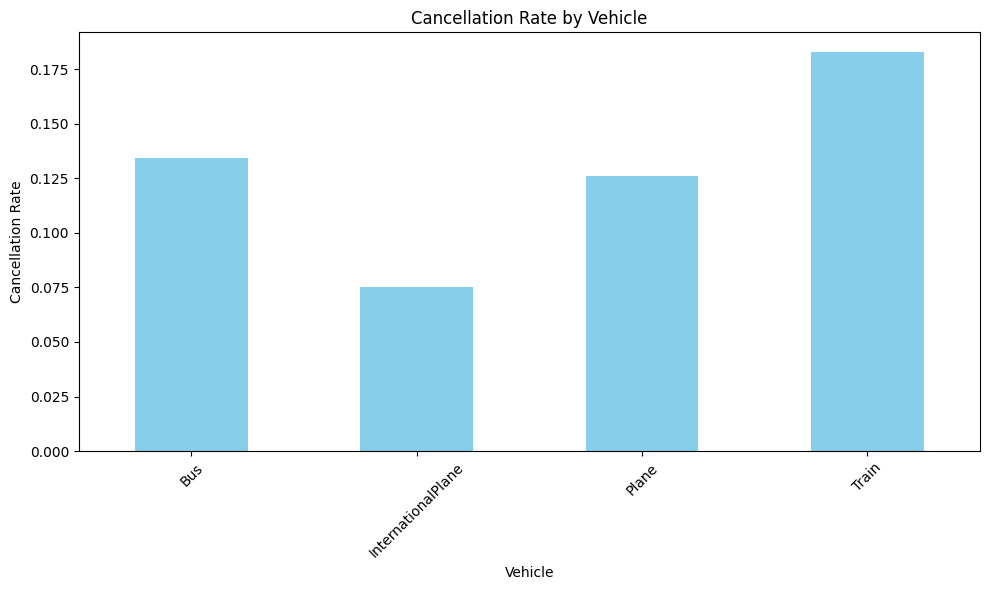

In [36]:
import matplotlib.pyplot as plt
cancel_rates = train_data.groupby('Vehicle')['Cancel'].mean()
plt.figure(figsize=(10, 6))
cancel_rates.plot(kind='bar', color='skyblue')
plt.title('Cancellation Rate by Vehicle')
plt.xlabel('Vehicle')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




<h4 style="text-align: left; font-family: Arial;">
  <strong>VehicleClass' feature may not be very informative. </strong>
</h4>


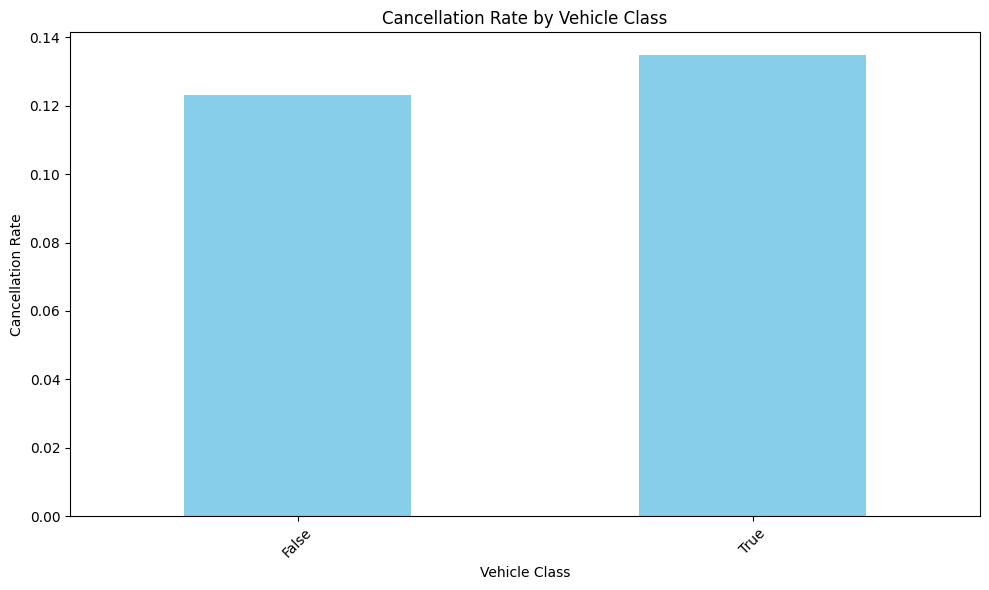

In [37]:
cancel_rates = train_data.groupby('VehicleClass')['Cancel'].mean()
plt.figure(figsize=(10, 6))
cancel_rates.plot(kind='bar', color='skyblue')
plt.title('Cancellation Rate by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h4 style="text-align: left; font-family: Arial;">
  <strong>Visualize the train data correlations with a correlation matrix. </strong>
</h4>


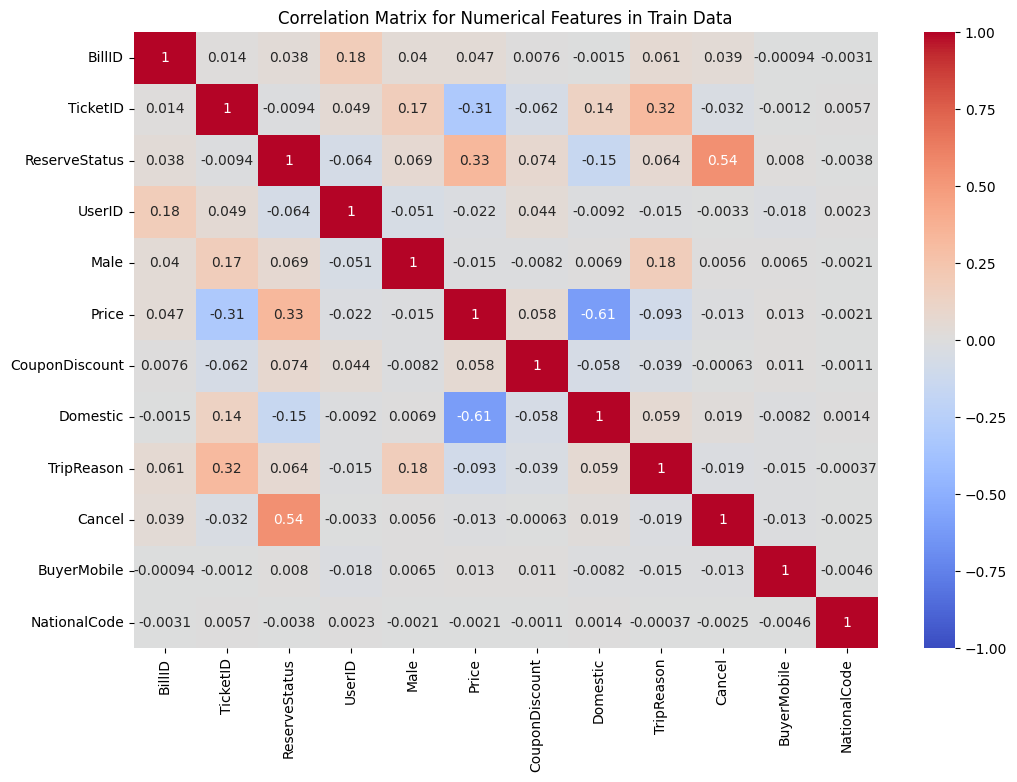

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_data = train_data.select_dtypes(include=['int64', 'float64'])
correlation = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix for Numerical Features in Train Data")
plt.show()


<h4 style="text-align: left; font-family: Arial;">
  <strong>A potentially significant feature is the time difference between 'DepartureTime' and 'CreatedTime'. This could indicate factors like booking lead time or last-minute cancellations. </strong>
</h4>


In [39]:


train_data['Created'] = pd.to_datetime(train_data['Created'])
train_data['DepartureTime'] = pd.to_datetime(train_data['DepartureTime'])
train_data['TimeDifference_minutes'] = round((train_data['DepartureTime'] - train_data['Created']).dt.total_seconds() / 60)
train_data


,Created,DepartureTime,BillID,TicketID,ReserveStatus,UserID,Male,Price,CouponDiscount,From,...,VehicleType,VehicleClass,TripReason,Vehicle,Cancel,HashPassportNumber_p,HashEmail,BuyerMobile,NationalCode,TimeDifference_minutes
81173,2022-08-21 11:03:33.883,2022-08-27 18:15:00,38755446,7537774.0,3,747021.0,1,2640000.0,0.0,یزد,...,مارالVIP تخت شو 25 نفره با شارژر اختصاصی,True,0,Bus,0,NaN,NaN,117595987163,193305148,9071.0
18754,2022-06-16 15:20:02.340,2022-09-01 11:30:00,37819689,2847850.0,2,NaN,1,3553500.0,0.0,مشهد,...,4 ستاره 4 تخته غزال,NaN,0,Train,0,NaN,NaN,258774611239,485804600,110650.0
93161,2022-10-18 12:08:25.060,2022-10-21 23:57:00,39652563,7729861.0,3,NaN,1,1220000.0,0.0,خمینی شهر,...,مارال مانیتوردار,True,1,Bus,0,NaN,NaN,599305991496,760677022,5029.0
85171,2022-09-25 09:33:34.800,2022-10-01 08:00:00,39331325,7645220.0,3,959914.0,0,790000.0,0.0,تهران,...,25 نفره (VIP),True,1,Bus,0,NaN,3c3d49777a1141ba6f91f68a6117f7687c84092298b262...,774751208362,915339530,8546.0
80798,2022-09-10 10:29:01.930,2022-09-14 18:10:00,39094093,2999353.0,2,564864.0,1,1920500.0,0.0,تهران,...,3 ستاره 6 تخته كوير,NaN,1,Train,0,NaN,c6528a5b6e3a964b953fcd192e2b49e33ae41197582f2f...,780404536873,798266396,6221.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59465,2022-07-26 15:23:32.713,2022-08-06 21:05:00,38430226,2919186.0,4,NaN,0,2810500.0,0.0,مشهد,...,4 ستاره 4 تخته غزال,NaN,0,Train,1,NaN,NaN,224948328416,92231896,16181.0
5520,2022-05-02 22:26:40.300,2022-05-03 08:30:00,37162748,7099241.0,3,NaN,1,850000.0,0.0,بندرعباس,...,اسکانیا,True,1,Bus,0,NaN,NaN,15096748550,288430549,603.0
20463,2022-03-26 11:26:21.690,2022-03-29 22:45:00,36661650,6970924.0,5,NaN,1,680000.0,0.0,بابل,...,سوپر ویژه 44,False,0,Bus,1,NaN,NaN,867895973998,62486610,4999.0
18638,2022-03-12 09:36:40.340,2022-03-12 10:35:00,36417784,6899861.0,3,NaN,0,250000.0,0.0,تبریز,...,BENZ C457 2+2 / سیستم تهویه مطبوع,False,1,Bus,0,NaN,NaN,837522176071,367037161,58.0


In [40]:

test_data['Created'] = pd.to_datetime(test_data['Created'])
test_data['DepartureTime'] = pd.to_datetime(test_data['DepartureTime'])
test_data['TimeDifference_minutes'] = round((test_data['DepartureTime'] - test_data['Created']).dt.total_seconds() / 60)
test_data

,Created,CancelTime,DepartureTime,BillID,TicketID,ReserveStatus,UserID,Male,Price,CouponDiscount,...,VehicleType,VehicleClass,TripReason,Vehicle,Cancel,HashPassportNumber_p,HashEmail,BuyerMobile,NationalCode,TimeDifference_minutes
9369,2022-07-08 00:29:44.210,NaN,2022-07-19 17:00:00,38162117,7368667.0,3,442001.0,1,2300000.0,0.0,...,مارال زیرپادارتخت شوشارژردارVIP,True,1,Bus,0,NaN,e6eab6bb7780ff4c0234f02df05351c75eb755286c24d7...,385294105086,913574581,16830.0
91940,2022-10-08 16:10:04.747,NaN,2022-10-09 23:00:00,39539931,7699740.0,3,NaN,1,1260000.0,0.0,...,غزال VIP تخت شو همراه با صندلی های مانیتور دار...,True,1,Bus,0,NaN,NaN,96361199492,422912021,1850.0
95628,2022-07-23 20:16:20.280,NaN,2022-08-03 09:26:00,38392048,2914600.0,2,493773.0,1,1297500.0,0.0,...,4 ستاره اتوبوسي صبا,NaN,1,Train,0,NaN,8db8bf3016f9e4ed90085abbacbd0237619eeeea76986f...,102600981920,213748194,15190.0
30554,2022-10-30 00:34:28.977,2022-10-31 07:40:52.263,2022-10-30 11:00:00,39791602,2355114.0,5,NaN,1,13500000.0,0.0,...,NaN,False,1,Plane,1,NaN,aec2c2f4883ea380a51cf3d9bd3b8205624e0e526c0f40...,49722301534,262657159,626.0
49628,2022-03-13 18:09:33.590,NaN,2022-03-24 23:00:00,36448460,6909235.0,3,695075.0,1,1300000.0,0.0,...,درسا 25 نفره VIP,True,0,Bus,0,NaN,NaN,915658832938,854700791,16130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84241,2022-03-09 18:20:14.183,2022-03-10 16:54:27.160,2022-03-10 21:45:00,36383567,2687995.0,4,736289.0,0,914000.0,0.0,...,4 ستاره اتوبوسي نگين,NaN,1,Train,1,NaN,1fb2e48bc76dd00310763b9a1c3b9cdf0e66a135a1a0a5...,209891112240,419713269,1645.0
6862,2022-09-15 18:26:10.930,NaN,2022-09-29 05:00:00,39179015,7615981.0,3,NaN,0,980000.0,0.0,...,مارال 25 نفره VIP,True,1,Bus,0,NaN,NaN,942307841473,476184854,19354.0
43528,2022-09-13 20:27:55.253,NaN,2022-09-13 23:37:00,39150605,3006594.0,2,307986.0,1,687500.0,0.0,...,3 ستاره 4 تخته سهند,NaN,1,Train,0,NaN,NaN,349419049796,298411066,189.0
66032,2022-09-23 06:53:41.313,NaN,2022-09-25 22:15:00,39292548,2333154.0,5,350355.0,1,6963000.0,0.0,...,NaN,False,1,Plane,0,NaN,040f5c25a8e1fa77bc104412688195977ee0059b4d6b46...,541303769274,711371472,3801.0


In [41]:
def discount_calculator(df) :
    thereshold = 10000
    df['CouponDiscount'] = df['CouponDiscount'].apply(lambda x : 'Above_10000' if x>=thereshold else('no_discount' if x==0 else 'down_10000'))
    return df
trian_data = discount_calculator(train_data)
test_data = discount_calculator(test_data)

In [42]:
train_data['CouponDiscount'].value_counts()

CouponDiscount
no_discount    85483
Above_10000     4265
down_10000      1165
Name: count, dtype: int64

<h4 style="text-align: left; font-family: Arial; color: #3399ff;">
  Three Steps to Transform Destination Cities
</h4>
<h4 style="text-align: left; font-family: Arial; color: #3399ff;">
  1. Unify Locations:
</h4>
<p>
  We gather all destinations (cities) from both the training and testing data into a single list. This ensures that all cities, regardless of whether they appear in the training or testing set, are encoded consistently using the same numerical labels.
</p>

<h4 style="text-align: left; font-family: Arial; color: #3399ff;">
  2. Encode Uniques:
</h4>
<p>
  We identify all unique city names (e.g., "New York", "London"). Each unique city is assigned a unique numerical label, starting from 0. This process creates a mapping between city names and their corresponding numerical representations.
</p>

<h4 style="text-align: left; font-family: Arial; color: #3399ff;">
  3. Replace Text with Numbers:
</h4>
<p>
  We replace the original text destinations ("From" and "To") in both the training and testing data with their corresponding numerical labels obtained in step 2. By doing this, we convert the categorical data (city names) into a format suitable for machine learning models that typically work best with numerical features.
</p>


In [43]:
all_locations = np.concatenate([train_data['From'], train_data['To'], test_data['From'], test_data['To']])
unique_locations = np.unique(all_locations)
label_encoder_loc = LabelEncoder()
label_encoder_loc .fit(unique_locations)
train_data['From'] = label_encoder_loc .transform(train_data['From'])
train_data['To'] = label_encoder_loc .transform(train_data['To'])
test_data['From'] = label_encoder_loc .transform(test_data['From'])
test_data['To'] = label_encoder_loc .transform(test_data['To'])


<h4 style="text-align: left; font-family: Arial;">
  <strong>Impute missing values in the 'VehicleClass' column. </strong>
</h4>


In [44]:
p_class = train_data.dropna(subset=['Domestic', 'Price', 'CouponDiscount', 'VehicleClass','ReserveStatus'])
p_class = p_class[['Domestic', 'Price', 'CouponDiscount', 'VehicleClass','ReserveStatus']]
p_test = train_data[train_data['VehicleClass'].isnull()]

In [45]:
p_class.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56436 entries, 81173 to 35683
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Domestic        56436 non-null  int64  
 1   Price           56436 non-null  float64
 2   CouponDiscount  56436 non-null  object 
 3   VehicleClass    56436 non-null  object 
 4   ReserveStatus   56436 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.6+ MB


In [46]:
p_class['VehicleClass'] = p_class['VehicleClass'].astype(int)
print(p_class)

       Domestic      Price CouponDiscount  VehicleClass  ReserveStatus
81173         1  2640000.0    no_discount             1              3
93161         1  1220000.0    no_discount             1              3
85171         1   790000.0    no_discount             1              3
43342         1  2600000.0    no_discount             1              5
91935         1  3320000.0    no_discount             1              3
...         ...        ...            ...           ...            ...
33800         1  9908000.0    no_discount             0              5
5520          1   850000.0    no_discount             1              3
20463         1   680000.0    no_discount             0              5
18638         1   250000.0    no_discount             0              3
35683         1  1350000.0    no_discount             1              5

[56436 rows x 5 columns]


In [47]:
null_counts = p_class.isnull().sum()
columns_with_null = null_counts[null_counts > 0]
if not columns_with_null.empty:
    print("Columns with null values and their counts:")
    print(columns_with_null)
else:
    print("There are no null values in any column.")

There are no null values in any column.


In [48]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

X_train, X_val, y_train, y_val = train_test_split(p_class[['Domestic', 'Price','ReserveStatus']],
                                                  p_class['VehicleClass'],
                                                  test_size=0.2,
                                                  random_state=42)
param_grid = {
    'learning_rate': [0.0001,0.01, 0.1, 0.3],
    'max_depth': [3, 5, 8, 12],
    'n_estimators': [100, 250, 500]
}
xgb_clf = XGBClassifier()
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
predicted_vehicle_class_val = best_model.predict(X_val)
classification_rep_val = classification_report(y_val, predicted_vehicle_class_val)
X_test = p_test[['Domestic', 'Price','ReserveStatus']]
predicted_vehicle_class = best_model.predict(X_test)
p_test['VehicleClass'] = predicted_vehicle_class

print("Classification report for validation set:\n", classification_rep_val)



Classification report for validation set:
               precision    recall  f1-score   support

           0       0.99      0.83      0.90      2840
           1       0.95      1.00      0.97      8448

    accuracy                           0.96     11288
   macro avg       0.97      0.92      0.94     11288
weighted avg       0.96      0.96      0.95     11288



/tmp/ipykernel_34/4090613072.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_test['VehicleClass'] = predicted_vehicle_class


In [49]:
best_params = grid_search.best_params_
print("Best model parameters:", best_params)

Best model parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}


In [50]:
p_test.VehicleClass.value_counts()

VehicleClass
1    34043
0      434
Name: count, dtype: int64

In [51]:
train_data.loc[train_data['VehicleClass'].isnull(), 'VehicleClass'] = p_test['VehicleClass'].values


if train_data['VehicleClass'].isnull().any():
    print("There are still null values in train_data['VehicleClass'].")
else:
    print("All null values in train_data['VehicleClass'] have been filled.")

All null values in train_data['VehicleClass'] have been filled.


In [52]:
train_data['VehicleClass'].value_counts()

VehicleClass
True     75757
False    15156
Name: count, dtype: int64

In [53]:
train_data['VehicleClass'] = train_data['VehicleClass'].map({True: 1, False: 0})


In [54]:
X_test_null = test_data[test_data['VehicleClass'].isnull()][['Domestic', 'Price','ReserveStatus']]
predicted_vehicle_class = best_model.predict(X_test_null)
test_data.loc[test_data['VehicleClass'].isnull(), 'VehicleClass'] = predicted_vehicle_class

In [55]:
test_data['VehicleClass'] = test_data['VehicleClass'].map({True: 1, False: 0})



<h4 style="text-align: left; font-family: Arial;">
  <strong>Our analysis suggests that the 'VehicleClass' feature might be as informative as we initially expected.</strong>
</h4>


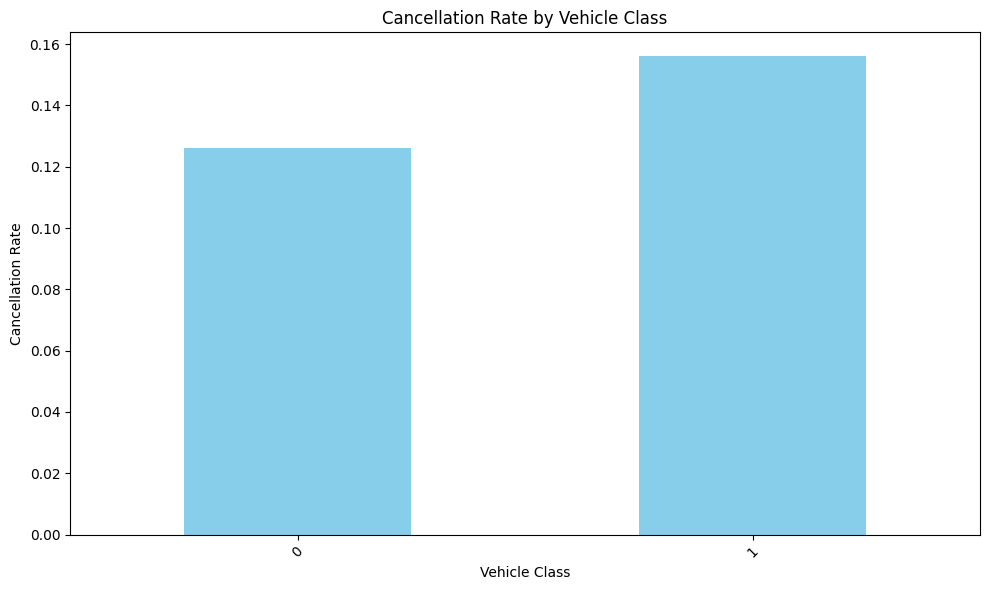

In [56]:
cancel_rates = train_data.groupby('VehicleClass')['Cancel'].mean()
plt.figure(figsize=(10, 6))
cancel_rates.plot(kind='bar', color='skyblue')
plt.title('Cancellation Rate by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h4 style="text-align: left; font-family: Arial;">
  <strong>Based on our analysis, we can select the most relevant features to improve the final prediction.</strong>
</h4>


In [57]:
test_X = test_data[['ReserveStatus','Male','Price','CouponDiscount','Domestic','Vehicle','VehicleClass','From','To','TimeDifference_minutes','TripReason']]
X = train_data[['ReserveStatus','Male','Price','CouponDiscount','Domestic','Vehicle','VehicleClass','From','To','TimeDifference_minutes','TripReason']]
y = train_data['Cancel']
y_test = test_data['Cancel']

In [58]:
label_encoder_cop = LabelEncoder()
label_encoder_car = LabelEncoder()
X.loc[:, 'CouponDiscount'] = label_encoder_cop.fit_transform(X['CouponDiscount'])
test_X.loc[:, 'CouponDiscount'] = label_encoder_cop.transform(test_X['CouponDiscount'])
X.loc[:, 'Vehicle'] = label_encoder_car.fit_transform(X['Vehicle'])
test_X.loc[:, 'Vehicle'] = label_encoder_car.transform(test_X['Vehicle'])

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)
test_X = scaler.transform(test_X)
x_scaled =X
x_scaled


array([[-0.15159698,  0.79807381, -0.08208976, ...,  1.00376594,
         0.03654455, -1.12495276],
       [-1.07987451,  0.79807381,  0.04798489, ...,  0.21985964,
         8.72042037, -1.12495276],
       [-0.15159698,  0.79807381, -0.28428571, ..., -0.70037819,
        -0.30900154,  0.88892622],
       ...,
       [ 1.70495808,  0.79807381, -0.36117713, ...,  0.73110288,
        -0.3115662 , -1.12495276],
       [-0.15159698, -1.25301694, -0.42240549, ...,  1.17418035,
        -0.7339668 ,  0.88892622],
       [ 1.70495808,  0.79807381, -0.26577482, ..., -0.70037819,
        -0.36662105, -1.12495276]])


<h4 style="text-align: left; font-family: Arial;">
  <strong>Let's proceed with data splitting and model training for final evaluation.</strong>
</h4>

In [60]:
import xgboost as xgb
model = xgb.XGBClassifier()
param_grid = {
    'n_estimators': [100, 300, 500], 
    'learning_rate': [0.01, 0.1, 0.3],  
    'max_depth': [3, 5, 8, 10],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=3)
grid_search.fit(x_scaled, y)
best_params = grid_search.best_params_
best_f1 = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best F1 Score:", best_f1)
best_model = grid_search.best_estimator_


Best Parameters: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 300}
Best F1 Score: 0.9430563730884008


In [61]:
predicted_test_data =best_model.predict(test_X)
classification_rep_val = classification_report(y_test, predicted_test_data)



<h4 style="text-align: left; font-family: Arial;">
  <strong>Our model performs exceptionally well, as evidenced by the confusion matrix. This suggests a high degree of reliability.</strong>
</h4>

In [62]:
print(classification_rep_val)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8538
           1       0.99      0.89      0.94      1564

    accuracy                           0.98     10102
   macro avg       0.99      0.95      0.96     10102
weighted avg       0.98      0.98      0.98     10102



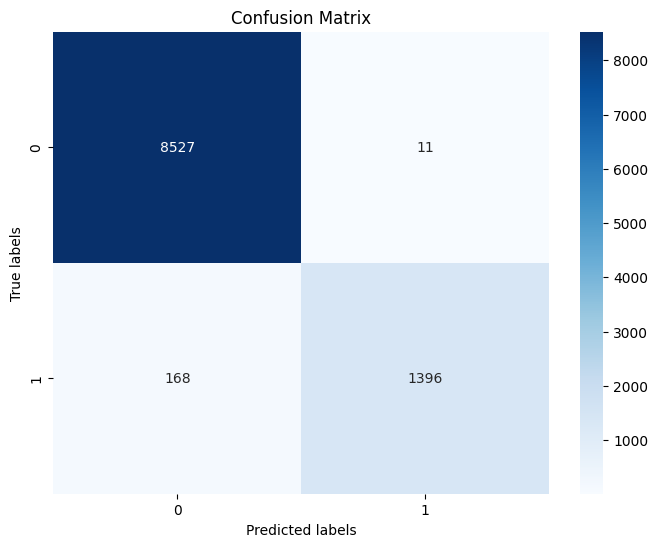

In [63]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, predicted_test_data)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=sorted(np.unique(y_test)), 
            yticklabels=sorted(np.unique(y_test)))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


<h4 style="text-align: left; font-family: Arial;">
  <strong>Analyzing feature importances to determine which features contribute most to model predictions</strong>
</h4>

In [64]:

feature_names = ['ReserveStatus','Male','Price','CouponDiscount','Domestic','Vehicle','VehicleClass','From','To','TimeDifference_minutes','TripReason']
x_scaled = pd.DataFrame(x_scaled, columns=feature_names)


                   Feature  Importance
6             VehicleClass    0.506312
0            ReserveStatus    0.480117
5                  Vehicle    0.007587
2                    Price    0.001113
4                 Domestic    0.000987
9   TimeDifference_minutes    0.000710
8                       To    0.000680
3           CouponDiscount    0.000678
7                     From    0.000673
10              TripReason    0.000650
1                     Male    0.000493


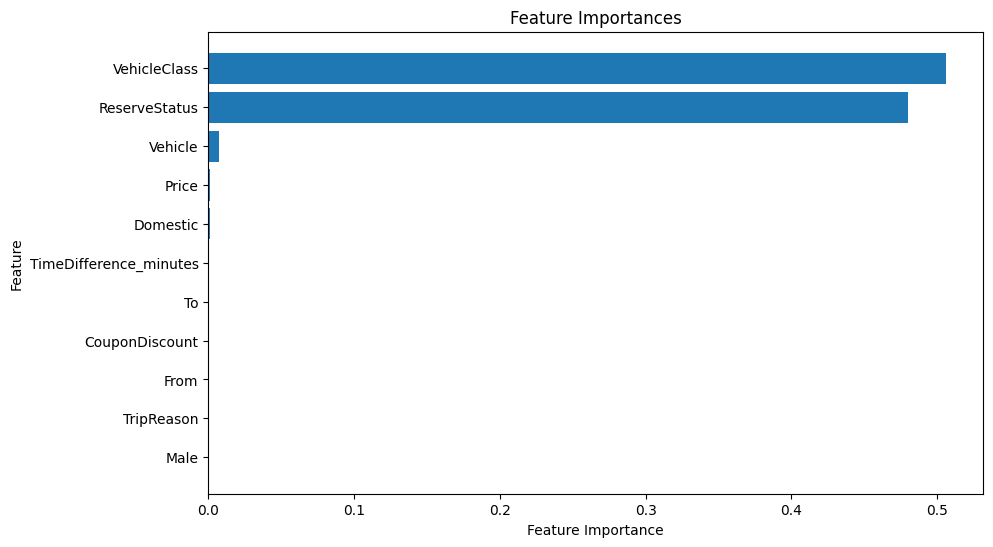

In [65]:
feature_names = x_scaled.columns if isinstance(x_scaled, pd.DataFrame) else [f'feature_{i}' for i in range(x_scaled.shape[1])]
feature_importances = best_model.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()



**thanks for your time and attention**